In [4]:
from forecasting_models.model_selector import select_forecasting_model
# from error_metrics.error import error_selector
import pandas as pd

In [5]:
df_alb = pd.read_csv("data/peajes_alberdi_training_preproc.csv")
df_alb['date'] = pd.to_datetime(df_alb['fecha'], format = '%Y-%m-%d')
df_alb.head()

,estacion,fecha,cantidad_pasos,Year-Month,Weekday,Weekday_Name,lag_1,diff_1,avg_by_weekday,cantidad_pasos_deseas,...,month-November,month-October,month-September,Weekday_Name-Monday,Weekday_Name-Saturday,Weekday_Name-Sunday,Weekday_Name-Thursday,Weekday_Name-Tuesday,Weekday_Name-Wednesday,date
0,alberdi,2016-01-01,5446.0,2016-01,4,Friday,NaN,NaN,10208.830601,0.533460,...,0,0,0,0,0,0,0,0,0,2016-01-01
1,alberdi,2016-01-02,6927.0,2016-01,5,Saturday,5446.0,1481.0,8592.125683,0.806203,...,0,0,0,0,1,0,0,0,0,2016-01-02
2,alberdi,2016-01-03,6630.0,2016-01,6,Sunday,6927.0,-297.0,6611.759563,1.002759,...,0,0,0,0,0,1,0,0,0,2016-01-03
3,alberdi,2016-01-04,9835.0,2016-01,0,Monday,6630.0,3205.0,9240.131868,1.064379,...,0,0,0,1,0,0,0,0,0,2016-01-04
4,alberdi,2016-01-05,9091.0,2016-01,1,Tuesday,9835.0,-744.0,9777.725275,0.929766,...,0,0,0,0,0,0,0,1,0,2016-01-05


In [7]:
model_class = select_forecasting_model("exponential smoothing")
model_instance = model_class(df=df_alb, x_col_name='date', y_col_name='cantidad_pasos', smoothing_level=0.5)
model_instance.fit_train()
y_test = model_instance.predict(df_alb['date'])
model_instance.plot_results(start_date='2016-01-01', end_date='2016-07-01')

C:\Users\federico.murphy\Documents\Ultimate Forecaster\Ultimate-Forecaster\forecasting_models\exponential_smoothing.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[self.model_name] = full_pred


ValueError: You are trying to merge on datetime64[ns] and object columns for key 'date'. If you wish to proceed you should use pd.concat

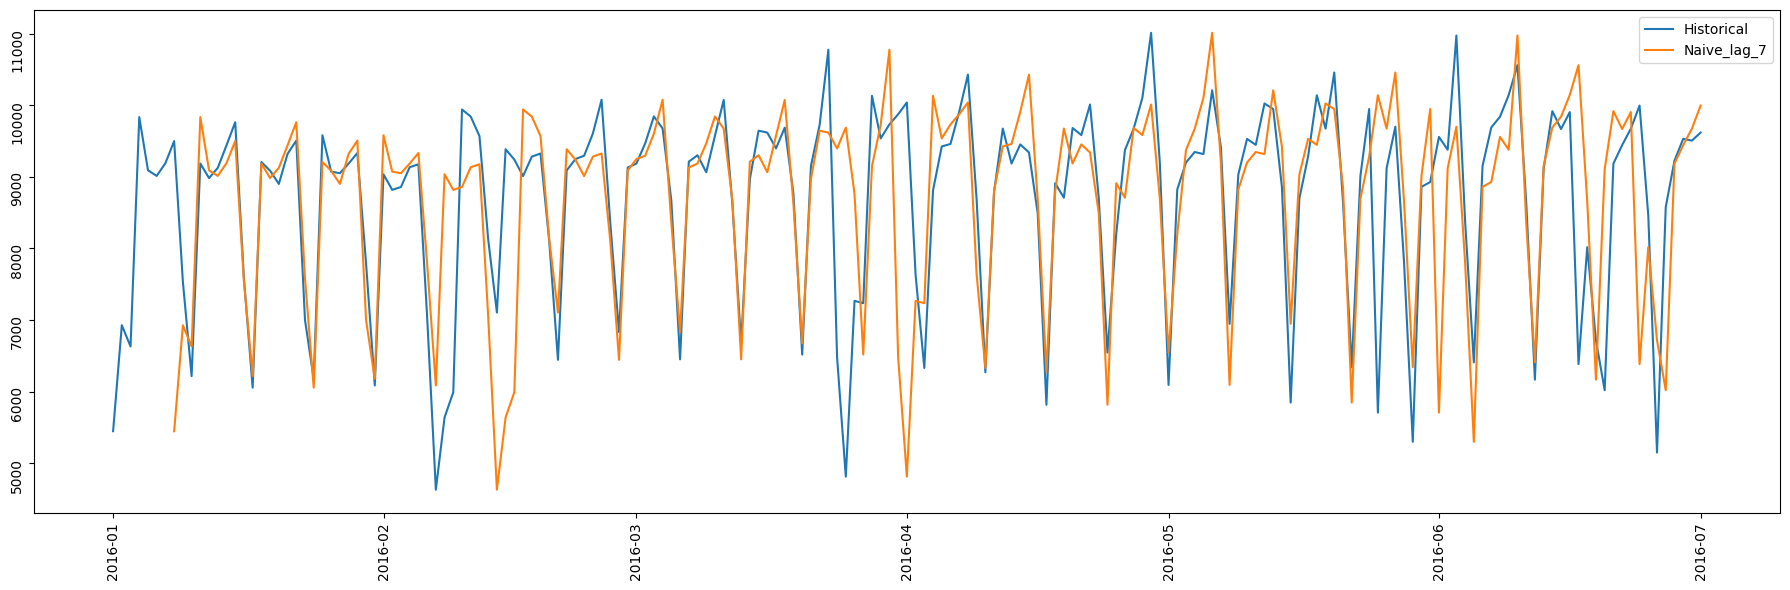

In [45]:
model_class = select_forecasting_model("Naive")
model_instance = model_class(df=df_alb, x_col_name='date', y_col_name='cantidad_pasos', n_periods=7)
model_instance.fit_train()
y_test = model_instance.predict(df_alb['date'])
model_instance.plot_results(start_date='2016-01-01', end_date='2016-07-01')

In [40]:
# # error_class = error_selector("MAPE")
# error_class = ErrorMAE
# y_pred_filter_nan = df_alb[model_instance.model_name].dropna()
# y_true = df_alb[df_alb.index.isin(y_pred_filter_nan.index)]['cantidad_pasos'].dropna()
# y_pred_filter_nan = y_pred_filter_nan[y_pred_filter_nan.index.isin(y_true.index)]
# 
# 
# 
# error_instance = error_class(y_true=y_true, y_pred=y_pred_filter_nan)
# print(error_instance.calculate_error())

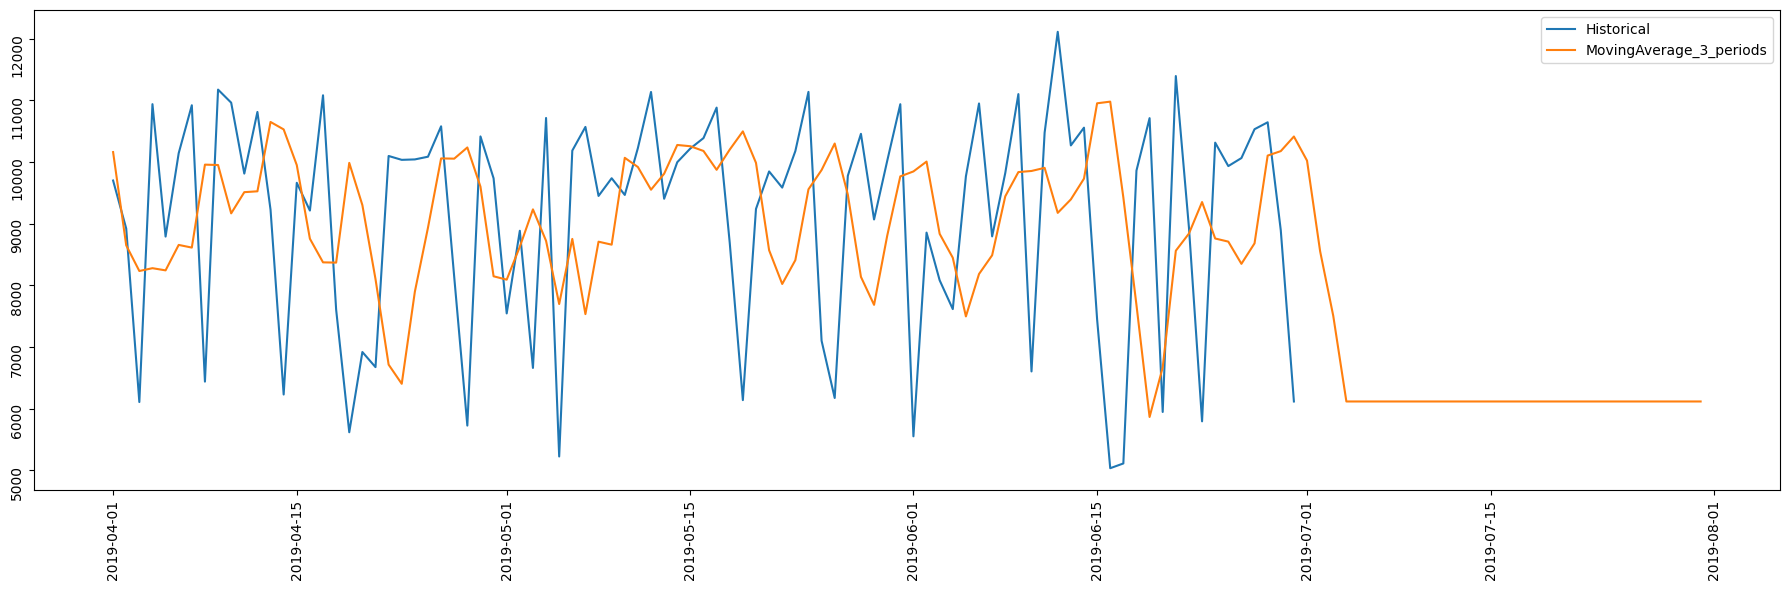

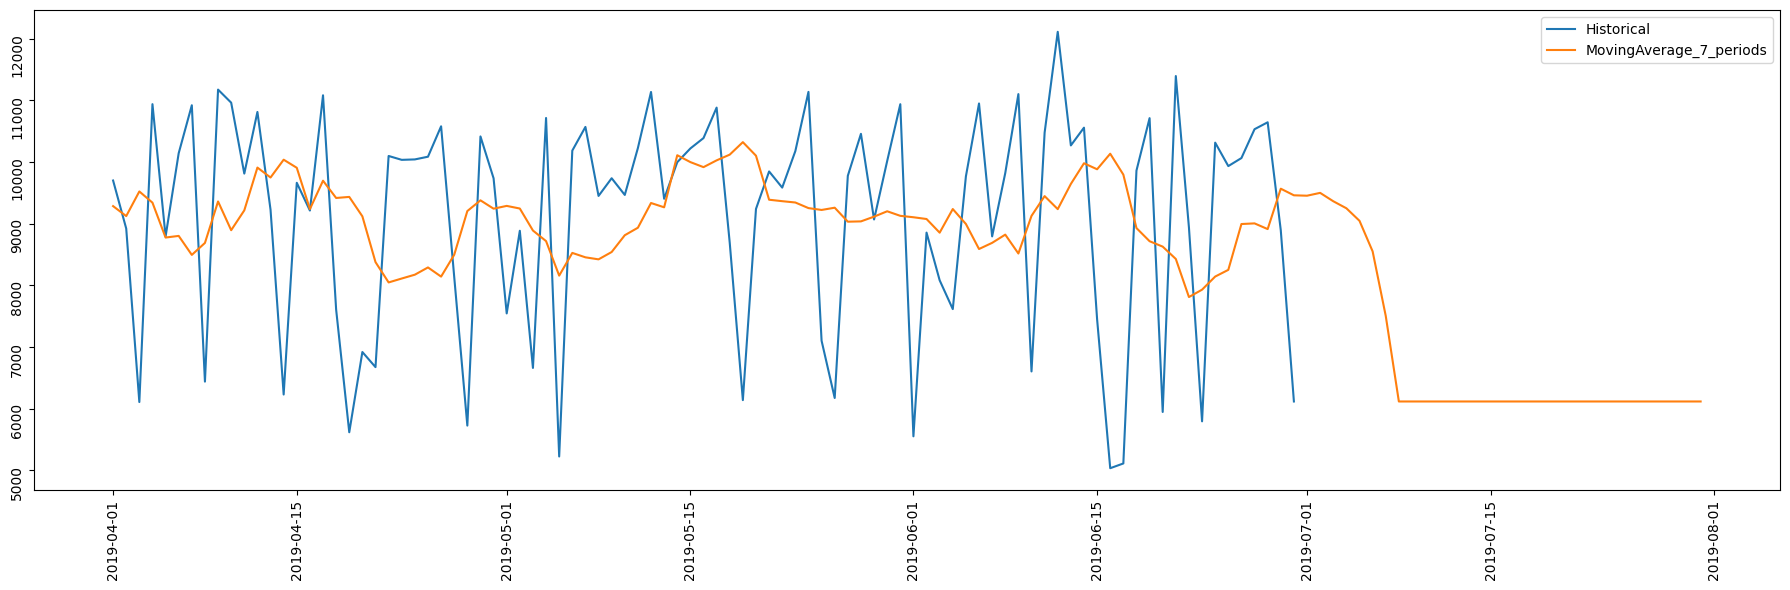

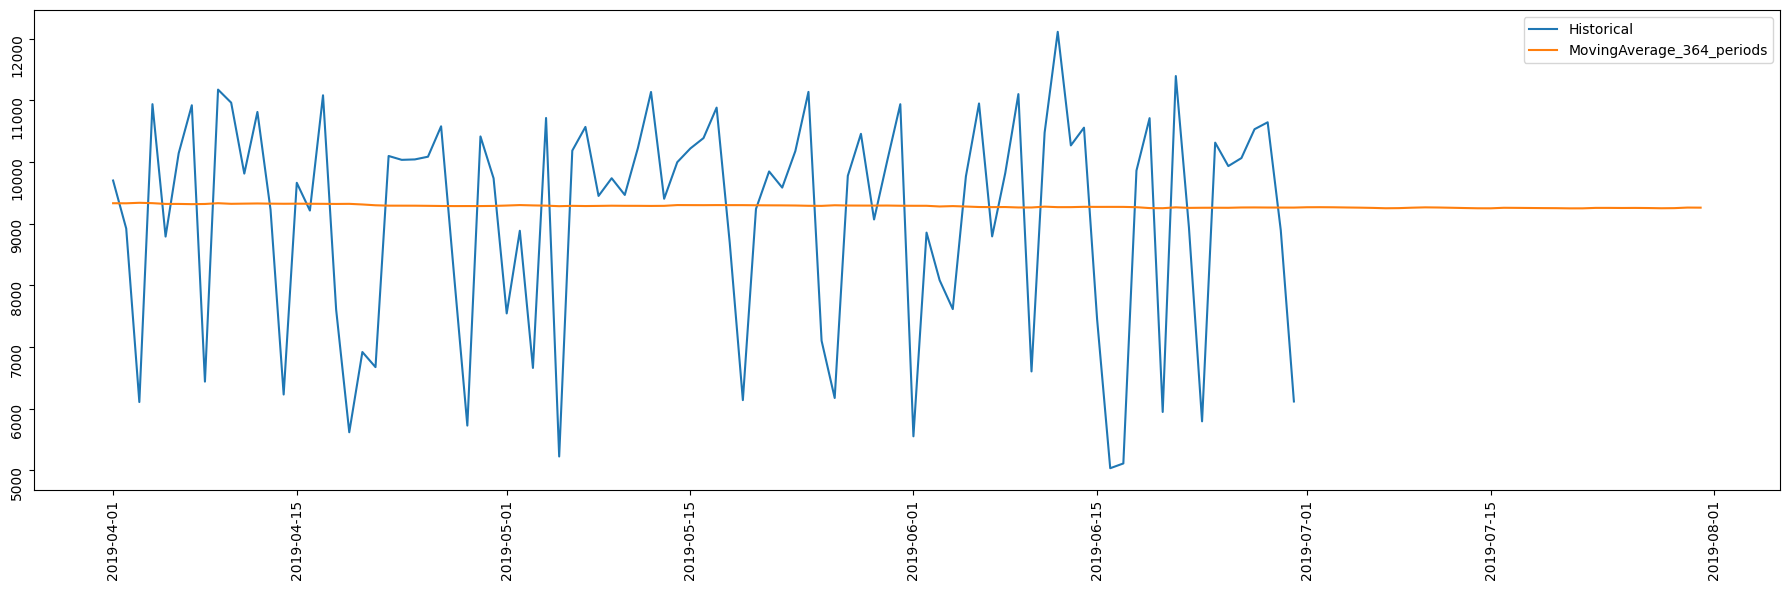

In [51]:
model_class = select_forecasting_model("Rolling Mean")
for period in [3, 7, 364]:
    model_instance = model_class(df=df_alb, x_col_name='date', y_col_name='cantidad_pasos', n_periods=period)
    model_instance.fit_train()
    model_instance.predict(df_alb['date'])
    model_instance.plot_results(start_date='2019-04-01', end_date='2019-07-31')

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA




In [10]:
df_no_nan = df_alb[df_alb['fecha'] < '2019-07-01']
df_nan = df_alb[df_alb['fecha'] >= '2019-07-01']

for alpha in [0.2, 0.5, 0.8]:
    # Fiteo el modelo
    model = SimpleExpSmoothing(df_no_nan['cantidad_pasos']).fit(smoothing_level=alpha, optimized=False)
    # Evaluo el fitting
    fit = list(model.fittedvalues)
    pred = list(model.forecast(len(df_nan)))
    full_pred = fit+pred
    df_alb[f'Expo_{alpha}_pred'] = full_pred


df_alb[['fecha', 'cantidad_pasos', 'Expo_0.2_pred', 'Expo_0.5_pred', 'Expo_0.8_pred']].head()

,fecha,cantidad_pasos,Expo_0.2_pred,Expo_0.5_pred,Expo_0.8_pred
0,2016-01-01,5446.0,5446.000,5446.000,5446.000
1,2016-01-02,6927.0,5446.000,5446.000,5446.000
2,2016-01-03,6630.0,5742.200,6186.500,6630.800
3,2016-01-04,9835.0,5919.760,6408.250,6630.160
4,2016-01-05,9091.0,6702.808,8121.625,9194.032


In [49]:
len(fit),len(pred)

(1277, 184)

In [48]:
fit

[5446.0,
 5446.0,
 6630.8,
 6630.16,
 9194.032,
 9111.6064,
 9032.72128,
 9160.144256,
 9432.028851199999,
 7912.80577024,
 6555.361154048,
 8659.8722308096,
 8918.37444616192,
 9083.674889232383,
 9368.734977846476,
 9684.146995569296,
 7999.2293991138595,
 6443.045879822772,
 8654.209175964555,
 8999.641835192911,
 8920.728367038582,
 9240.945673407716,
 9452.989134681542,
 7489.797826936308,
 6440.359565387262,
 8952.871913077452,
 9048.97438261549,
 9050.594876523097,
 9158.118975304618,
 9298.023795060924,
 8092.4047590121845,
 6486.480951802437,
 8525.296190360486,
 8759.459238072097,
 8838.291847614419,
 9074.858369522884,
 9155.771673904577,
 7471.954334780915,
 5197.590866956183,
 5550.718173391237,
 5902.943634678248,
 9133.38872693565,
 9700.27774538713,
 9596.055549077426,
 8422.411109815486,
 7367.682221963098,
 8982.336444392618,
 9189.267288878524,
 9045.853457775704,
 9234.77069155514,
 9307.754138311027,
 8343.150827662206,
 6823.030165532442,
 8636.606033106487,
 9125

In [11]:
pred

[6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
 6740.368912860808,
